<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/ml_playground6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import graphviz
import pandas as pd
import numpy as np
import random
import math
from matplotlib import pyplot as plt
from sklearn import tree

plt.figure(figsize=(5,5))

def plot_points(features, labels, size_of_points=100, ax=None):
  # print("size of points: ", size_of_points)
  X = np.array(features)
  y = np.array(labels)
  spam_idxs = np.argwhere(y==1)
  ham_idxs = np.argwhere(y==0)
  spam = X[np.argwhere(y==1)].squeeze(axis=1)
  ham = X[np.argwhere(y==0)].squeeze(axis=1)
  spam_x, spam_y = spam[:,0], spam[:,1]
  ham_x, ham_y = ham[:,0], ham[:,1]

  if np.isscalar(size_of_points ):
    spam_weights = size_of_points
    ham_weights = size_of_points
  else:
    spam_weights = size_of_points[spam_idxs]
    ham_weights = size_of_points[ham_idxs]
  # print(spam_weights, ham_weights)
  if ax is None:
    plt.scatter(spam_x, spam_y,
                s = spam_weights,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter(ham_x, ham_y,
                s = ham_weights,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('Lottery')
    plt.ylabel('Sale')
    plt.legend(['Spam','Ham'])
  else:
    ax.scatter(spam_x, spam_y,
                s = spam_weights,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    ax.scatter(ham_x, ham_y,
                s = ham_weights,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    ax.set_xlabel('Lottery')
    ax.set_ylabel('Sale')
    ax.legend(['Spam','Ham'])


def plot_model(X, y, model, size_of_points=100, ax=None):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
      plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
      plt.contour(xx, yy, Z,colors = 'k',linewidths = 1, levels=0)
      plot_points(X, y, size_of_points)
      plt.show()
    else:
      ax.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
      ax.contour(xx, yy, Z,colors = 'k',linewidths = 1, levels=0)
      plot_points(X, y, size_of_points, ax=ax)

def plot_regressor(model, features, labels):
  x = np.linspace(0,85,1000)
  plt.figure(figsize=(5,3))
  plt.scatter(features, labels)
  plt.plot(x, model.predict(x.reshape([-1,1])))
  plt.xlabel("Age")
  plt.ylabel("Days per week")
  # plt.ylim(-3.2, 3.2)
  plt.show()

<Figure size 500x500 with 0 Axes>

# Ensemble

Techniques of combining weak learners into strong learner:
* **Bagging**:
  * build sub datasets by randomly draw from dataset (with replacement)
  * train (weak) models with these sub-datasets.
  * combine week models to build storng one. prediction is done by voting (if classification) or averaging (if regression)
* **Boosting**:
  * start by training a random model, the first weak learner. Evaluate it on entire dataset
  * shrink points with good pred; enlarge points with bad pred. Train 2nd weak learner on this modified dataset.
  * continue to build several weak models
  * combine the week models in same way as Bagging - i.e. voting or averaging.


# Random Forest
## Spam email example Dataset
Dataset contains number of appearances of the words 'Lottery' and 'Sale' in each email and whether the email is spam or not.

In [75]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


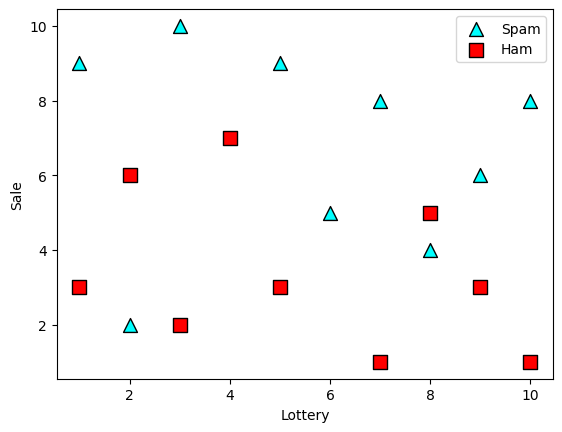

In [ ]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

## Decision Tree Classifier

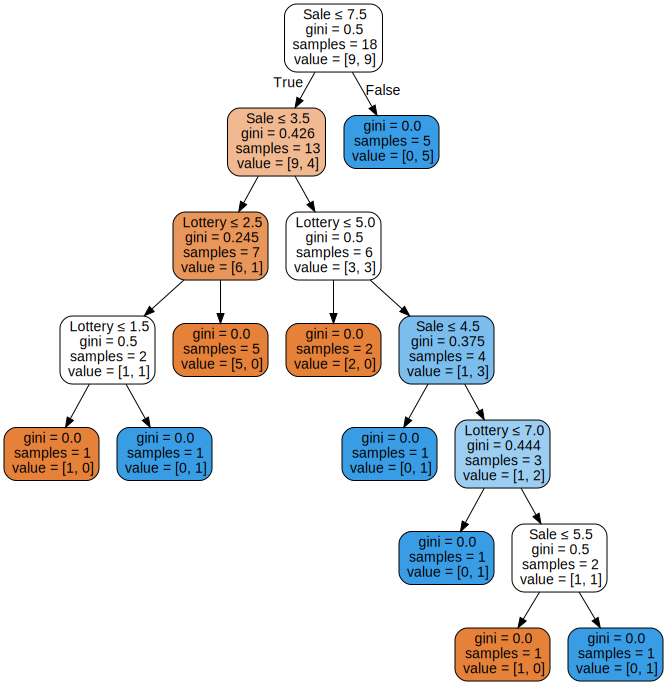

In [ ]:
# fit a decision tree and visualise it

from sklearn.tree import DecisionTreeClassifier, export_graphviz

decision_tree = DecisionTreeClassifier()
decision_tree.fit(features, labels)

dot_data = export_graphviz(decision_tree, feature_names=['Lottery', 'Sale'],
                           filled=True, rounded=True, special_characters=True)
g = graphviz.Source(dot_data)
g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


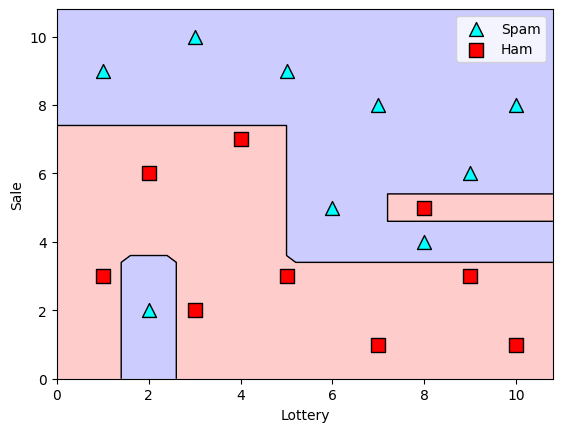

In [ ]:
plot_model(features, labels, decision_tree)

## Manual Impl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


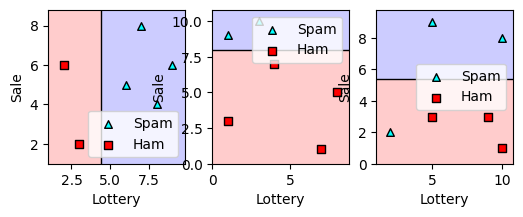

In [ ]:
# divide the datasets (18 data points) into 3 subsets
weak_learners = []
dataset_size = len(spam_dataset)
num_subsets = 3
subset_size = dataset_size // num_subsets
fig, axes = plt.subplots(1, num_subsets, figsize=(num_subsets*2,2))
for i in range(num_subsets):
  start_idx = i*subset_size
  end_idx = start_idx + subset_size -1 # df index range is all inclusive, so -1
  sub_features = features.loc[start_idx:end_idx]
  sub_labels = labels.loc[start_idx:end_idx]
  # plot_points(sub_features, sub_labels, ax=axes[i])

  weak_learner = DecisionTreeClassifier(max_depth=1)
  weak_learner.fit(sub_features, sub_labels)
  weak_learners.append(weak_learner)
  plot_model(sub_features, sub_labels, weak_learner, size_of_points=30, ax=axes[i])

In [ ]:
from IPython.display import display, HTML

html_content = '<div style="display: flex; justify-content: space-around; ">'
for wl in weak_learners:
  dot_data = export_graphviz(wl, feature_names=['Lottery', 'Sale'],
                             filled=True, rounded=True, special_characters=True)
  g = graphviz.Source(dot_data)
  svg = g.pipe(format='svg').decode('utf-8')
  html_content += f'<div>{svg}</div>'
html_content += '</div>'
display(HTML(html_content))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


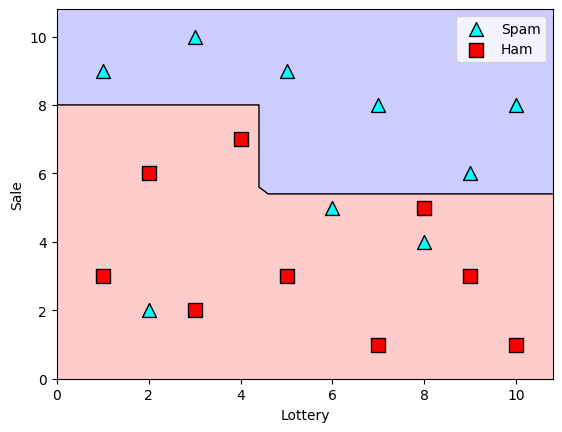

In [ ]:
# combine the weak_learners into strong one
class StrongLearner():
  def __init__(self, weak_learners):
    self.weak_learners = weak_learners

  def predict(self, feature):
    preds = np.zeros((len(feature)))
    for wl in self.weak_learners:
      # pred is 1-D array, same len as feature
      pred = wl.predict(feature)
      # print(pred)
      preds = preds + pred

    # we have 3 weak learners, if 2 out of 3 got 0 then return 0
    # if 2 out of 3 got 1 then return 1
    threshold = len(self.weak_learners)/2
    return np.where(preds>threshold, 1, 0)

strong_learner = StrongLearner(weak_learners=weak_learners)
plot_model(features, labels, strong_learner)

## SKLearn Impl

0.8333333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


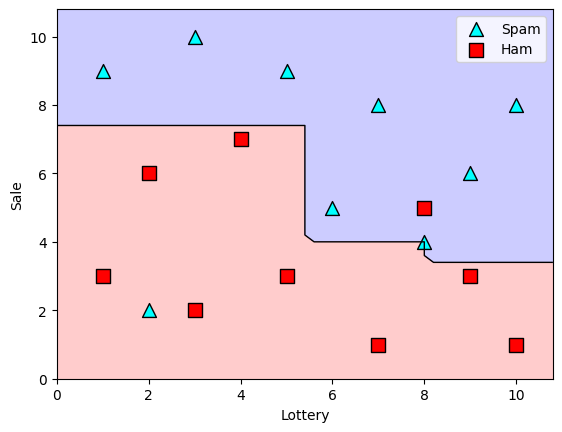

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=5, max_depth=1, random_state=0)
rfc_model.fit(features, labels)
print(rfc_model.score(features, labels))
plot_model(features, labels, rfc_model)

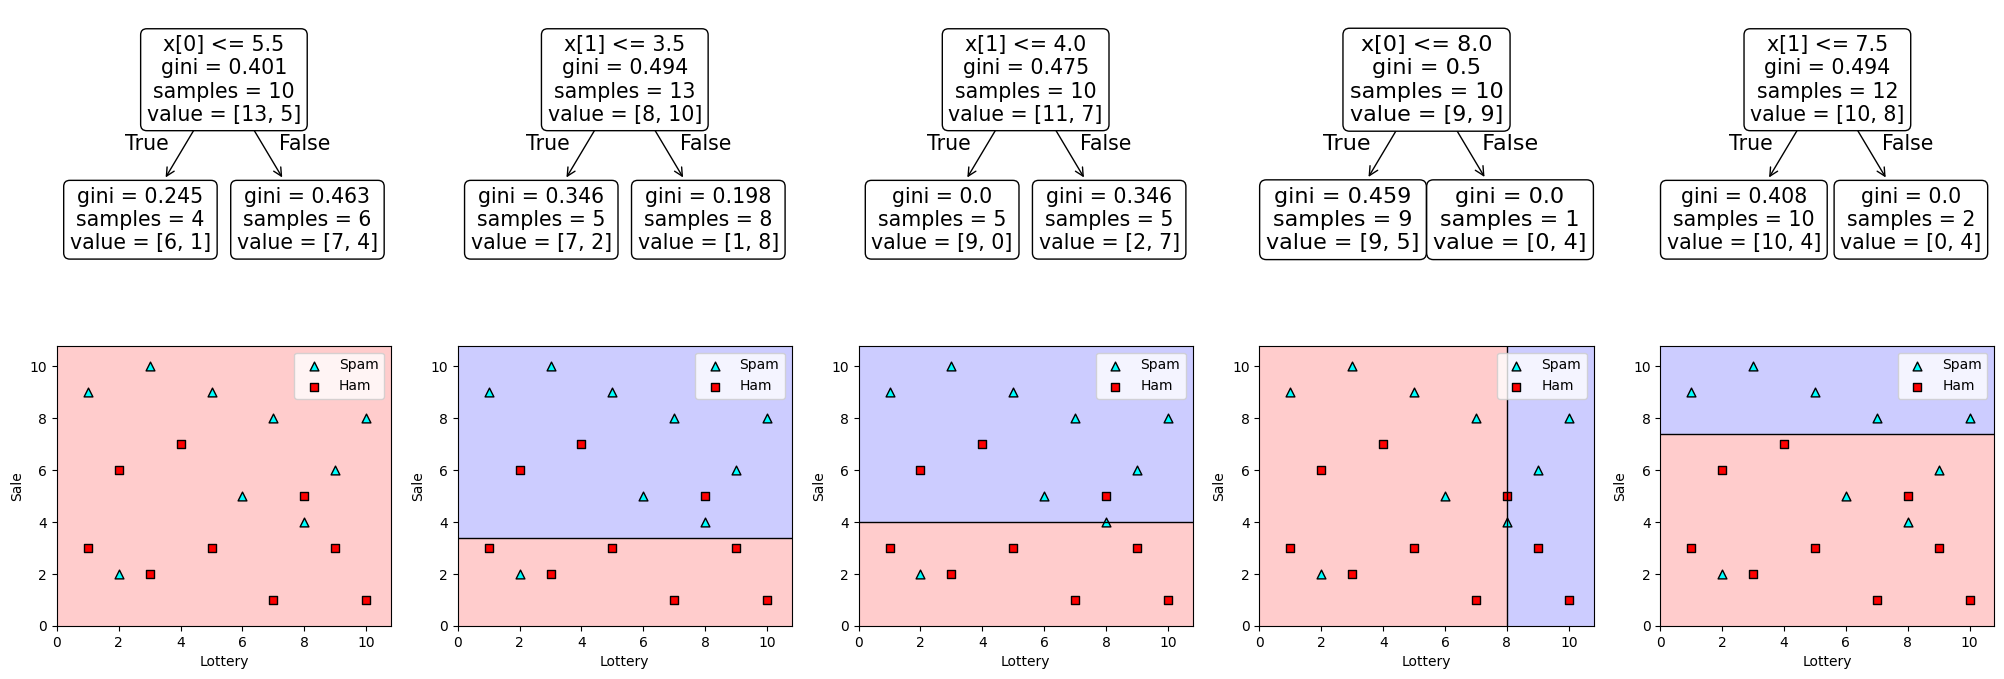

In [ ]:
from IPython.display import display, HTML
from sklearn import tree

fig, axes = plt.subplots(2,5, figsize=(25,8))
for i, wl in enumerate(rfc_model.estimators_):
  tree.plot_tree(wl, ax=axes[0,i], rounded=True)
  plot_model(features, labels, wl, size_of_points=40, ax=axes[1,i])
plt.show()

# AdaBoost
Adaptive boosting:
* each weak learner is decision tree of depth 1
* unlike Random Forest, each weak learner is trained on whole dataset.
* after each weak learner training, we enlarge the incorrectly classified points (by giving a weight to each point).
* train new weak learner with the modified dataset.

The score of weak learner to satisfy the following:
1. is positive if accuracy of learner > 0.5
2. is 0 if accuracy of learner == 0.5
3. is nagative if accuracy of learner < 0.5
4. is large positive number if accuracy close to 1
5. is large negative number if accuracy close to 0

The log-odds or logits satisfies the above:
$logit(x) = \ln\frac{x}{1-x}$, where x is a probability (i.e. between 0 and 1)

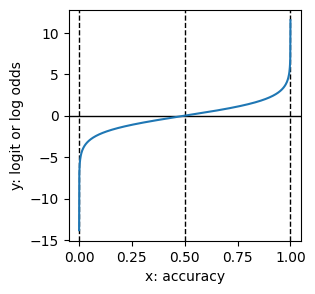

In [ ]:
# plot logit function y=ln(x/(1-x)) where x is (-1,1)
xs = np.linspace(.000001, .99999, 1000)
plt.figure(figsize=(3,3))
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0.5, color='k', linewidth=1, linestyle='--')
plt.axvline(x=0, color='k', linewidth=1, linestyle='--')
plt.axvline(x=1, color='k', linewidth=1, linestyle='--')
plt.plot(xs, np.log(xs/(1-xs)))
plt.xlabel('x: accuracy')
plt.ylabel('y: logit or log odds')

plt.show()


## Data points with weights

In chp9 we learned Gini impurity, entropy, etc.

**Gini Impurity Index** or *Gini index* measures how diverse is the dataset - the bigger the value, the more diverse; a pure set always has Gini index 0. In a set with $m$ elements and $n$ classes, with $a_i$ elements belonging to the $i$-th class, the Gini impurity index is
$$Gini = 1-p_1^2-p_2^2\ldots -p_n^2 \text { , where } p_i=\frac{a_i}{m}
$$

With weights, the $a_i$ and $m$ are no longer simple counts of elements of each class, but the total weights of each element (data point).

In [ ]:
# return list of count of each class
def counts(elements, weights):
  element_counts = {}
  for i, element in enumerate(elements):
    if element in element_counts:
      element_counts[element] += weights[i]
    else:
      element_counts[element] = weights[i]

  return list(element_counts.values())

def gini(elements, weights=None):
  if weights is None:
    weights = np.ones(len(elements)) # default weights to all ones.
  cnts = counts(elements, weights)
  total = sum(cnts)
  gini = 1 - sum( [(c/total)**2 for c in cnts])
  return gini

In [ ]:
elements = ['A', 'A', 'A', 'C', 'B', 'C']
element_weights = [1, 2, 4, 3, 2, 1]
gini(elements), gini(elements, element_weights)

(np.float64(0.6111111111111112), 0.591715976331361)

similarly for entropy:

**Entropy**: in a set of $m$ elements and $n$ classe, with $a_i$ elements belonging to the $i$-th class, the entropy is
$$Entropy=-p_1\log_2(p_1)-p_2\log_2(p_2)\ldots -p_i\log_2(p_i) \text{ , where } p_i=\frac{a_i}{m}
$$

With weights, the $a_i$ and $m$ are no longer simple counts of elements of each class, but the total weights of each element (data point).

In [ ]:
# similarly for entropy calc
# generalise it
def entropy(elements, weights=None):
  if weights is None:
    weights = np.ones(len(elements))
  cnts = np.array(counts(elements, weights))
  total = sum(cnts)
  calc_prob = lambda x: - x/total * np.log2(x/total)
  entropy = calc_prob(np.array(cnts)).sum()
  # entropy = sum([-p * math.log2(p) for p in p_elements])

  return entropy

In [ ]:
set1=['red']*8+['blue']*2
set2 = ['red']*4 + ['blue']*3 + ['yellow']*2 + ['green']
set_weights = [1,2,3,4,5,5,4,3,2,1]
entropy(set1), entropy(set2), entropy(set1, set_weights), entropy(set2, set_weights)

(np.float64(0.7219280948873623),
 np.float64(1.8464393446710154),
 np.float64(0.4689955935892812),
 np.float64(1.6358275845379553))

## Manual Impl

In [ ]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset


,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


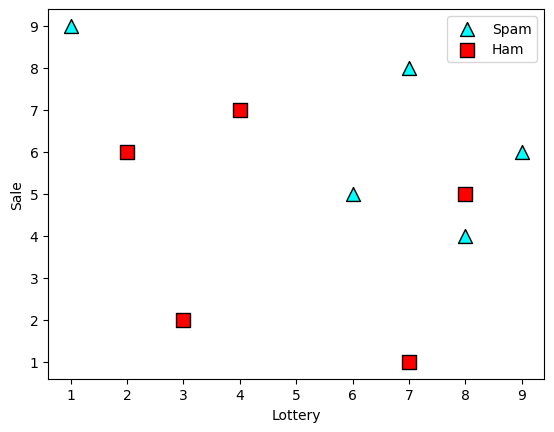

In [ ]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
class AdaBoostWeakLearner():
  def __init__(self, weights):
    self.weights = weights
    self._model = DecisionTreeClassifier(max_depth=1)

  def fit(self, features, labels):
    self._model.fit(features, labels, sample_weight=self.weights)
    preds = self._model.predict(features)
    self.num_corrects = self.weights[np.argwhere(preds==labels)].sum()
    self.num_incorrects = self.weights[np.argwhere(preds!=labels)].sum()
    self.rescaling_factor = self.num_corrects / self.num_incorrects
    self.accuracy = self.num_corrects / self.weights.sum()
    # self.logit = math.log(self.accuracy/(1-self.accuracy))
    self.logit = math.log(self.rescaling_factor)

    self.new_weights = self.weights.copy()
    self.new_weights[preds != labels] *= self.rescaling_factor

  def predict(self, features):
    return self._model.predict(features)

  def print_stats(self):
    print(f"initial weights: ", self.weights)
    print(f"correct={self.num_corrects}, incorrect={self.num_incorrects}, rescaling_factor={self.rescaling_factor}")
    print(f"accuracy={self.accuracy}, logit={self.logit}")
    print("new weights =", self.new_weights)


initial weights:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
correct=7.0, incorrect=3.0, rescaling_factor=2.3333333333333335
accuracy=0.7, logit=0.8472978603872037
new weights = [1.         1.         1.         2.33333333 1.         1.
 2.33333333 1.         1.         2.33333333]
score=0.7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


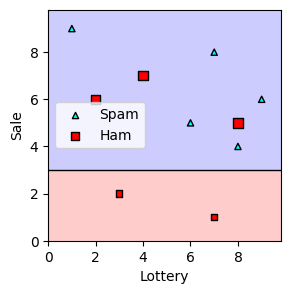

In [ ]:
# step 1 assign each point a weight of 1
weights = np.ones(len(features))

# build weak learner 1
weak_learner1 = AdaBoostWeakLearner(weights)
weak_learner1.fit(features, labels)
weak_learner1.print_stats()
print(f"score={weak_learner1._model.score(features, labels)}")

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner1, size_of_points=20*weak_learner1.new_weights)
plt.show()


initial weights:  [1.         1.         1.         2.33333333 1.         1.
 2.33333333 1.         1.         2.33333333]
correct=11.000000000000002, incorrect=3.0, rescaling_factor=3.6666666666666674
accuracy=0.7857142857142857, logit=1.299282984130261
new weights = [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 2.33333333 1.         1.         2.33333333]
score=0.7857142857142857


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


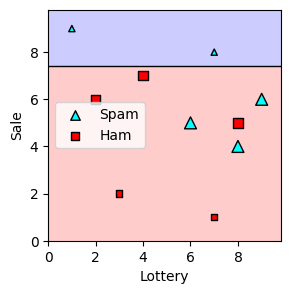

In [ ]:
# build weak learner 2
weak_learner2 = AdaBoostWeakLearner(weak_learner1.new_weights)
weak_learner2.fit(features, labels)
weak_learner2.print_stats()
print(f"score={weak_learner2._model.score(features, labels, sample_weight=weak_learner2.weights)}")

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner2, size_of_points=20*weak_learner2.new_weights)
plt.show()

initial weights:  [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 2.33333333 1.         1.         2.33333333]
correct=17.66666666666667, incorrect=4.333333333333334, rescaling_factor=4.0769230769230775
accuracy=0.8030303030303032, logit=1.4053425560905852
new weights = [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 9.51282051 4.07692308 4.07692308 2.33333333]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


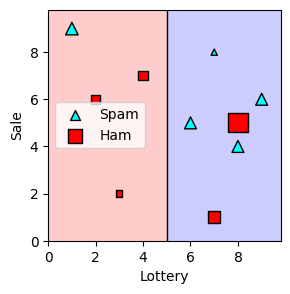

In [ ]:
# build weak learner 3
weak_learner3 = AdaBoostWeakLearner(weak_learner2.new_weights)
weak_learner3.fit(features, labels)
weak_learner3.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner3, size_of_points=20*weak_learner3.new_weights)
plt.show()

initial weights:  [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 9.51282051 4.07692308 4.07692308 2.33333333]
correct=24.333333333333336, incorrect=11.000000000000002, rescaling_factor=2.212121212121212
accuracy=0.6886792452830187, logit=0.7939518796819108
new weights = [1.         1.         8.11111111 2.33333333 8.11111111 8.11111111
 9.51282051 4.07692308 4.07692308 2.33333333]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


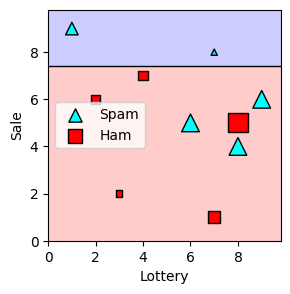

In [ ]:
# build weak learner 4
weak_learner4 = AdaBoostWeakLearner(weak_learner3.new_weights)
weak_learner4.fit(features, labels)
weak_learner4.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner4, size_of_points=20*weak_learner4.new_weights)
plt.show()

initial weights:  [1.         1.         8.11111111 2.33333333 8.11111111 8.11111111
 9.51282051 4.07692308 4.07692308 2.33333333]
correct=34.48717948717949, incorrect=14.179487179487182, rescaling_factor=2.432188065099457
accuracy=0.708640674394099, logit=0.8887912905136045
new weights = [ 1.          1.          8.11111111  5.67510549  8.11111111  8.11111111
 23.13696852  4.07692308  4.07692308  5.67510549]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


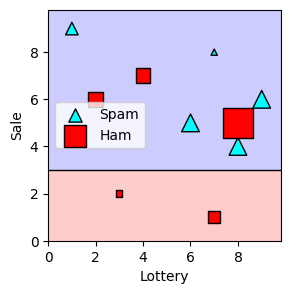

In [ ]:
# build weak learner 5
weak_learner5 = AdaBoostWeakLearner(weak_learner4.new_weights)
weak_learner5.fit(features, labels)
weak_learner5.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner5, size_of_points=20*weak_learner5.new_weights)
plt.show()

initial weights:  [ 1.          1.          8.11111111  5.67510549  8.11111111  8.11111111
 23.13696852  4.07692308  4.07692308  5.67510549]
correct=47.675213675213676, incorrect=21.2991452991453, rescaling_factor=2.238362760834671
accuracy=0.6912019826517968, logit=0.8057446882800904
new weights = [ 2.23836276  1.         18.15560906  5.67510549 18.15560906  8.11111111
 23.13696852  4.07692308  9.12563279  5.67510549]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


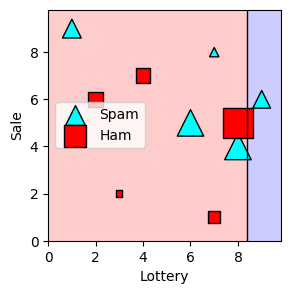

In [ ]:
# build weak learner 6
weak_learner6 = AdaBoostWeakLearner(weak_learner5.new_weights)
weak_learner6.fit(features, labels)
weak_learner6.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner6, size_of_points=20*weak_learner6.new_weights)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


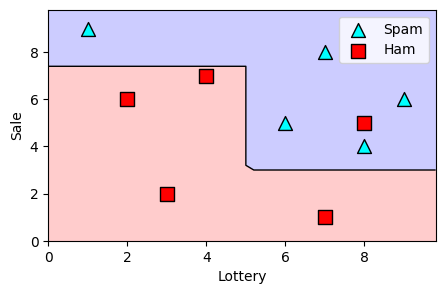

In [ ]:
# after 3 weak learners, we stop and combine them into strong learner
# combine the weak_learners into strong one
class AdaBoostStrongLearner():
  def __init__(self, weak_learners):
    self.weak_learners = weak_learners

  def predict(self, feature):
    preds = np.zeros((len(feature)))
    for wl in self.weak_learners:
      # pred is 1-D array, same len as feature
      pred = wl.predict(feature)
      # change the values from 0,1 into -1, 1
      pred[pred==0] = -1

      # preds is the weighted sum of all the weak_learners' predictions
      preds = preds + pred * wl.logit
    preds = np.where(preds <= 0, 0, 1)

    return preds

weak_learners = [weak_learner1, weak_learner2, weak_learner3,
                #  weak_learner6, #weak_learner5, #weak_learner6,
                 ]
strong_learner = AdaBoostStrongLearner(weak_learners=weak_learners)
plt.figure(figsize=(5,3))
plot_model(features, labels, strong_learner)
plt.show()
# strong_learner.predict(features), labels


## SKLearn impl

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=3)
adaboost_classifier.fit(features, labels)
adaboost_classifier.score(features, labels)

0.9

In [ ]:
adaboost_classifier.estimator_weights_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


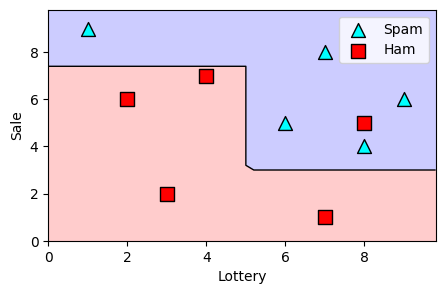

In [ ]:
plt.figure(figsize=(5,3))
plot_model(features, labels, adaboost_classifier)
plt.show()

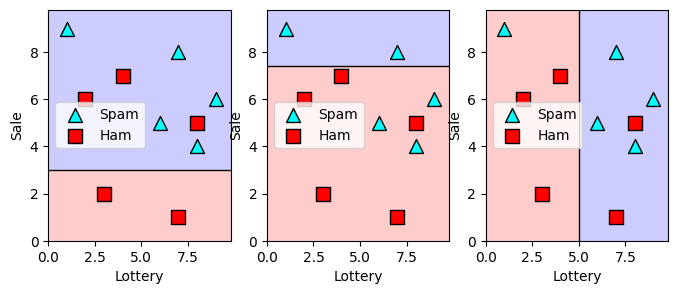

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(8,3))
estimators = adaboost_classifier.estimators_
for i, estimator in enumerate(estimators):
  plot_model(features, labels, estimator, ax=axes[i])


# Gradient Boost
Diff between Gradient Boost and AdaBoost:
* Gradient Boost allows Decision Trees of depth > 1

Gradient Boost can be used for both classification and regression - some tweaking is required.

Here we will use a regression as example.

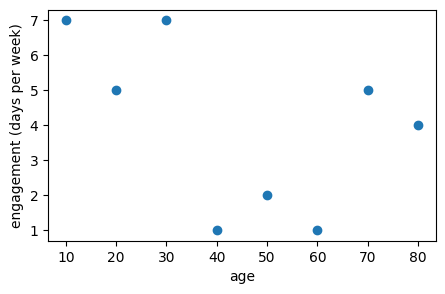

In [ ]:
# dataset is ages, labels are number of engagement activities per week
features = np.array([10, 20, 30, 40, 50, 60, 70, 80]).reshape(-1,1)
labels = np.array([7, 5, 7, 1, 2, 1, 5, 4]).reshape(-1,1)
plt.figure(figsize=(5,3))
plt.scatter(features, labels)
plt.xlabel('age')
plt.ylabel('engagement (days per week)')
plt.show()

MSE between labels Y and predicted value y_hat (same value for all data points):
$$MSE=\frac{(y_1-\hat y)^2+\ldots+(y_n-\hat y)^2}{n} = \frac{1}{n}\left(n\hat y^2+\sum_{i=1}^n{ (y_i^2-2y_i\hat y)}\right)=\hat y^2+\frac{1}{n}\sum_{i=1}^n{y_i(y_i-2\hat y)}
$$
To minimise MSE, make partial derivitive 0 and solve for y_hat
$$
\frac{\partial MSE}{\partial \hat y} = 2\hat y -\frac{1}{n}\sum_{i=1}^n{2y_i} = 0
$$
$$\therefore \hat y=\frac{1}{n}\sum_{i=1}^n{y_i}
$$, which is the mean of Y

## Manual Impl

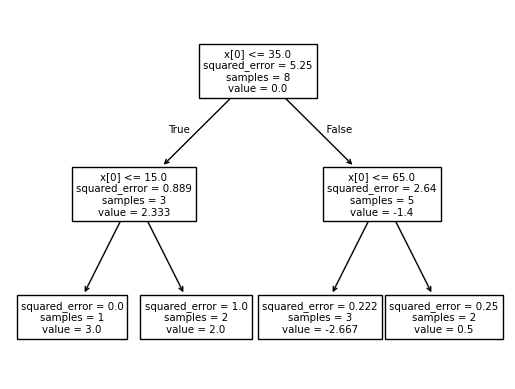

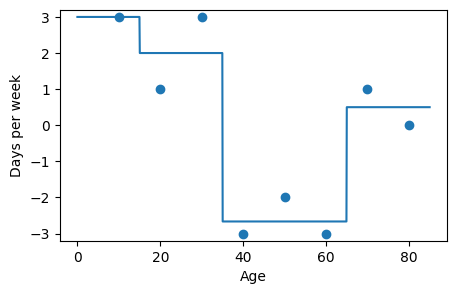

prediction=
[[ 3.        ]
 [ 2.        ]
 [ 2.        ]
 [-2.66666667]
 [-2.66666667]
 [-2.66666667]
 [ 0.5       ]
 [ 0.5       ]], residuals=
[[ 0.6       ]
 [-0.6       ]
 [ 1.4       ]
 [-0.86666667]
 [ 0.13333333]
 [-0.86666667]
 [ 0.6       ]
 [-0.4       ]]


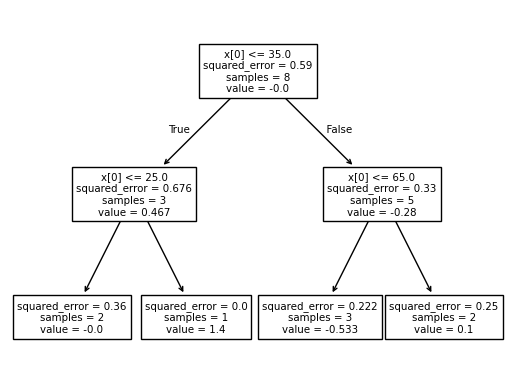

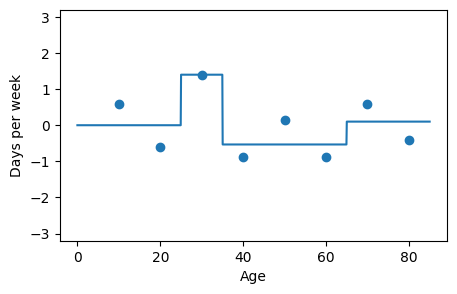

prediction=
[[-2.22044605e-16]
 [-2.22044605e-16]
 [ 1.40000000e+00]
 [-5.33333333e-01]
 [-5.33333333e-01]
 [-5.33333333e-01]
 [ 1.00000000e-01]
 [ 1.00000000e-01]], residuals=
[[ 0.6 ]
 [-0.6 ]
 [ 0.28]
 [-0.44]
 [ 0.56]
 [-0.44]
 [ 0.52]
 [-0.48]]


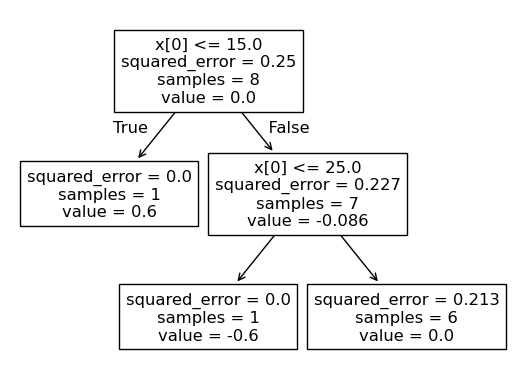

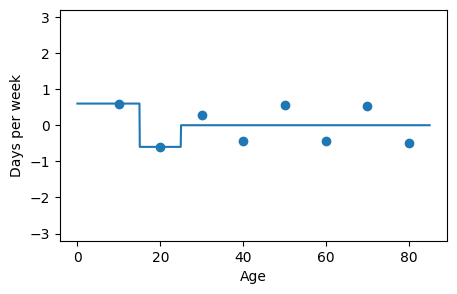

prediction=
[[ 6.00000000e-01]
 [-6.00000000e-01]
 [ 1.85037171e-17]
 [ 1.85037171e-17]
 [ 1.85037171e-17]
 [ 1.85037171e-17]
 [ 1.85037171e-17]
 [ 1.85037171e-17]], residuals=
[[ 0.12]
 [-0.12]
 [ 0.28]
 [-0.44]
 [ 0.56]
 [-0.44]
 [ 0.52]
 [-0.48]]


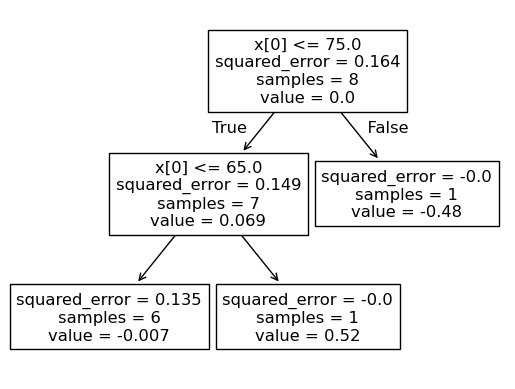

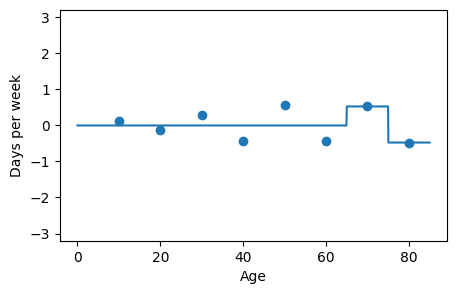

prediction=
[[-0.00666667]
 [-0.00666667]
 [-0.00666667]
 [-0.00666667]
 [-0.00666667]
 [-0.00666667]
 [ 0.52      ]
 [-0.48      ]], residuals=
[[ 0.12533333]
 [-0.11466667]
 [ 0.28533333]
 [-0.43466667]
 [ 0.56533333]
 [-0.43466667]
 [ 0.104     ]
 [-0.096     ]]


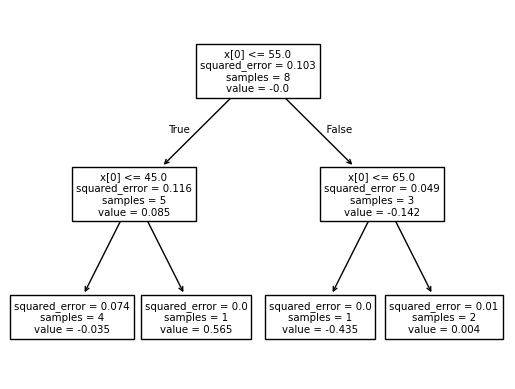

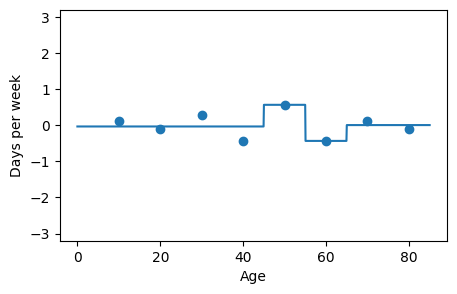

prediction=
[[-0.03466667]
 [-0.03466667]
 [-0.03466667]
 [-0.03466667]
 [ 0.56533333]
 [-0.43466667]
 [ 0.004     ]
 [ 0.004     ]], residuals=
[[ 0.15306667]
 [-0.08693333]
 [ 0.31306667]
 [-0.40693333]
 [ 0.11306667]
 [-0.08693333]
 [ 0.1008    ]
 [-0.0992    ]]


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

num_trees = 5 # number of weak learners
lr = 0.8 # learning rate
# first weak learner is a decision tree of depth 0 that fit the whole dataset.
# it's basically a node that assign the same label to each data point.
# since we use MSE, then the optimal value of the prediction is the average
# value of the labels.
initial_prediction = np.full(labels.shape, np.mean(labels))
residuals = labels - initial_prediction
weak_learners = []

for _ in range(num_trees):
  wl = DecisionTreeRegressor(max_depth=2)
  wl.fit(features, residuals)
  weak_learners.append(wl)
  tree.plot_tree(wl)

  plot_regressor(wl, features, residuals)

  prediction = wl.predict(features).reshape(-1,1)
  residuals -= prediction * lr
  print(f"prediction=\n{prediction}, residuals=\n{residuals}")


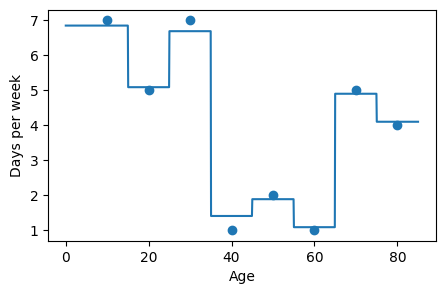

In [ ]:
class GradientBoost():
  def __init__(self, num_trees=5, lr=0.8):
    self.num_trees = num_trees
    self.lr = lr
    self.weak_learners = []
    self.initial_prediction = 0

  def fit(self, features, labels):
    self.initial_prediction = np.mean(labels)
    init_pred = np.full(labels.shape, np.mean(labels))
    residuals = labels - init_pred

    for _ in range(self.num_trees):
      wl = DecisionTreeRegressor(max_depth=2)
      wl.fit(features, residuals)
      self.weak_learners.append(wl)
      prediction = wl.predict(features).reshape(-1,1)
      residuals -= prediction * lr

  def predict(self, X):
    # print(f"X shape={X.shape}, init_pred shap={self.initial_prediction.shape}")
    y_pred = np.full(X.shape[0], self.initial_prediction)

    # Add the contributions of each tree
    for tree in self.weak_learners:
        y_pred += self.lr * tree.predict(X)

    return y_pred

gradientBoostModel = GradientBoost(num_trees=5, lr=0.8)
gradientBoostModel.fit(features, labels)
plot_regressor(gradientBoostModel, features, labels)

## SKLearn Impl

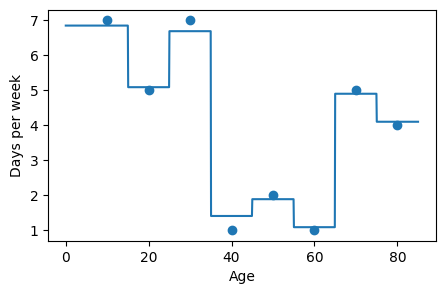

0.9920253561904762

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(learning_rate=0.8, n_estimators=5, max_depth=2)
gbr_model.fit(features, labels.ravel())
plot_regressor(gbr_model, features, labels)
gbr_model.score(features, labels)

Stage 1:


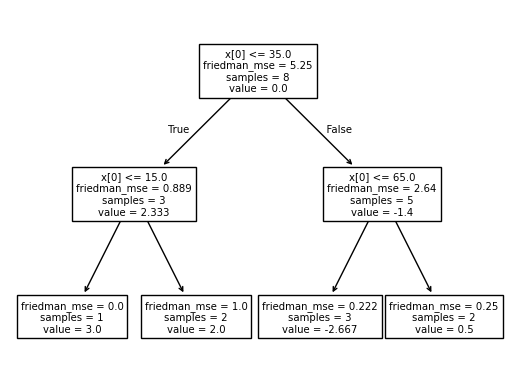

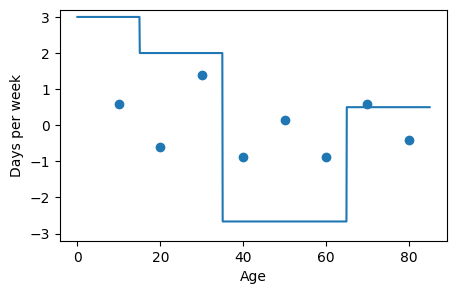

Stage 2:


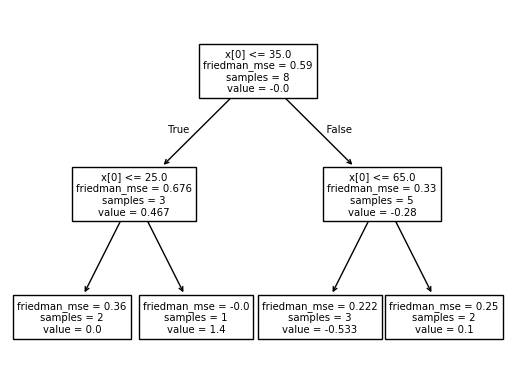

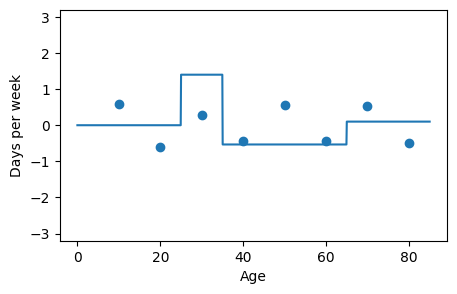

Stage 3:


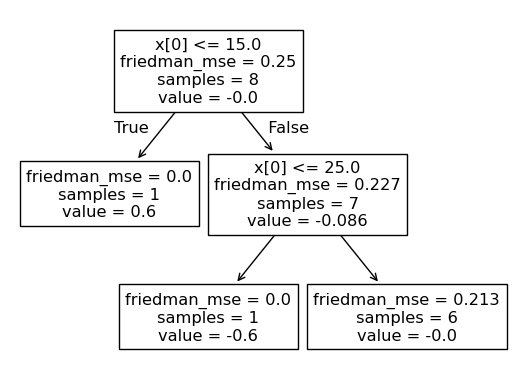

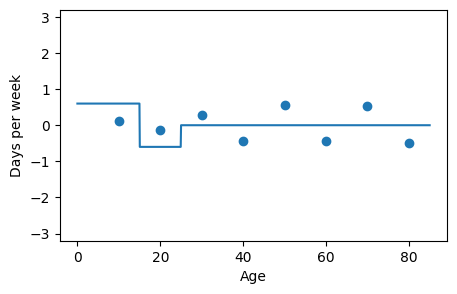

Stage 4:


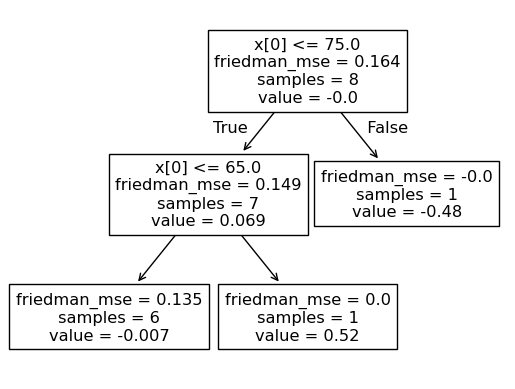

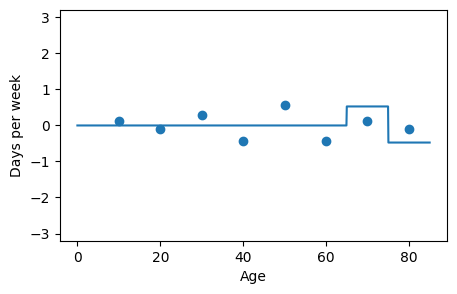

Stage 5:


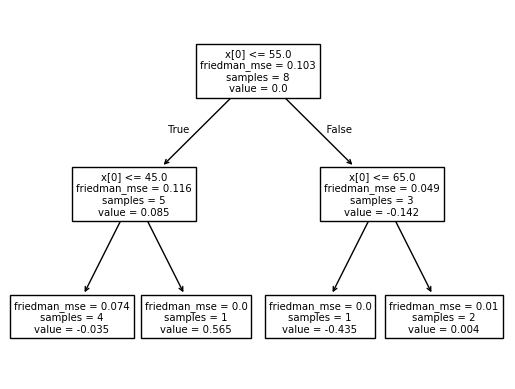

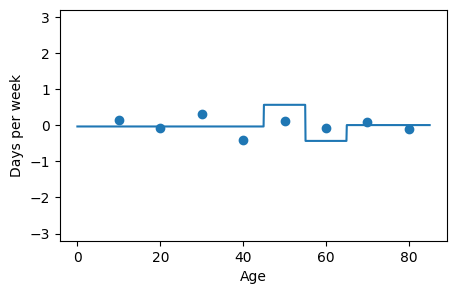

In [ ]:
from sklearn import tree

initial_prediction = np.full_like(labels, gbr_model.init_.predict([[0] * features.shape[1]])[0])

# Loop through the estimators and calculate residuals
residuals = labels - initial_prediction

for stage, estimators_in_stage in enumerate(gbr_model.estimators_):
  print(f"Stage {stage + 1}:")
  for estimator in estimators_in_stage:
    tree.plot_tree(estimator)

    stage_prediction = estimator.predict(features).reshape(-1,1)
    residuals -= gbr_model.learning_rate * stage_prediction

    plt.ylim(-3.2, 3.2)
    plot_regressor(estimator, features, residuals)
    plt.show()

# XGBoost

Extreme Gradient Boosting. Differences from Gradient Boost:
* XGBoost uses *similarity score*
* add a pruning step to prevent overfitting

## XGBoost Similarity Score

The similarity score is a metric to measure how similar the elements of a set are.

Given a set ${a_1, a_2, \ldots, a_n}$, the similarity score is the square of the sum of the elements, divided by number of elements: $\frac{(a_1+a_2+\ldots+a_n)^2}{n}$

A hyperparameter λ is added to prevent overfitting:
$$\text{similarity score} = \frac{1}{n+\lambda}\left(\sum_{i=1}^na_i\right)^2
$$

**Similarity Gain** = similarity score of child node - similarity score of parent node

In [12]:
def sim_score(s, lamb=0.0):
  a = s.ravel()
  return a.sum()**2 / (len(a) + lamb)

print(sim_score(np.array([10,-10,4])))
print(sim_score(np.array([10,-10,4]), 2))
print(sim_score(np.array([7,7,7])))
print(sim_score(np.array([7,7,7]), 2))
print(sim_score(np.array([7])))
print(sim_score(np.array([7]),2 ))
print(sim_score(np.array([1,1,1]))) # algo is not perfect, this should be higher than 10,-10,4
print(sim_score(np.array([1,1,1]), 2))

5.333333333333333
3.2
147.0
88.2
49.0
16.333333333333332
3.0
1.8


## Manual Impl

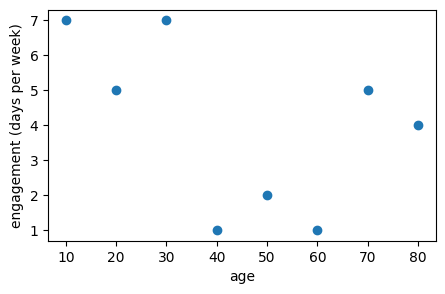

In [108]:
# dataset is ages, labels are number of engagement activities per week
features = np.array([10, 20, 30, 40, 50, 60, 70, 80]).reshape(-1,1)
labels = np.array([7, 5, 7, 1, 2, 1, 5, 4]).reshape(-1,1)
plt.figure(figsize=(5,3))
plt.scatter(features, labels)
plt.xlabel('age')
plt.ylabel('engagement (days per week)')
plt.show()

In [25]:
from sklearn.tree import DecisionTreeRegressor

num_trees = 5
initial_pred = np.full_like(labels, 0.5, dtype=np.float16)
residuals = labels - initial_pred

# for i in range(num_trees):
sim = sim_score(residuals)
# split the dataset in all possible ways and calc similarity score
splits_scores = []
for j in range(1, len(residuals)):
  left = residuals[:j]
  right = residuals[j:]
  combined_sim_score = sim_score(left) + sim_score(right)
  splits_scores.append(combined_sim_score)

In [58]:
splits_scores, sim

([np.float64(108.28571428571429),
  np.float64(108.66666666666666),
  np.float64(124.13333333333333),
  np.float64(106.0),
  np.float64(100.13333333333333),
  np.float64(98.66666666666667),
  np.float64(98.0)],
 np.float64(98.0))

In [61]:
sim_score_root = max(splits_scores)
sim_gain_of_root = sim_score_root - sim
sim_gain_of_root

np.float64(26.133333333333326)

In [28]:
# highest similarity score is 124.13, so the split is
left = residuals[:3]
right = residuals[3:]
left, right, features[:3], features[3:]
# so the split should be at age 35

(array([[6.5],
        [4.5],
        [6.5]]),
 array([[0.5],
        [1.5],
        [0.5],
        [4.5],
        [3.5]]),
 array([[10],
        [20],
        [30]]),
 array([[40],
        [50],
        [60],
        [70],
        [80]]))

In [63]:
def split_set(a):
  splits_scores = []
  for j in range(1, len(a)):
    left = a[:j]
    right = a[j:]
    combined_sim_score = sim_score(left) + sim_score(right)
    splits_scores.append(combined_sim_score)

  idx = np.array(splits_scores).argmax() + 1
  return a[:idx], a[idx:], splits_scores

left, right, scores = split_set(residuals)
sim_score_root = max(scores)
print(f"similarity gain = {sim_score_root-sim_score(residuals)}")
left, right, scores, features[:3], features[3:] # split at age 35

similarity gain = 26.133333333333326


(array([[6.5],
        [4.5],
        [6.5]]),
 array([[0.5],
        [1.5],
        [0.5],
        [4.5],
        [3.5]]),
 [np.float64(108.28571428571429),
  np.float64(108.66666666666666),
  np.float64(124.13333333333333),
  np.float64(106.0),
  np.float64(100.13333333333333),
  np.float64(98.66666666666667),
  np.float64(98.0)],
 array([[10],
        [20],
        [30]]),
 array([[40],
        [50],
        [60],
        [70],
        [80]]))

In [68]:
# repeat for left and right branches of the split/tree
_, _, sim_scores_left = split_set(left)
print(f"similarity gain = {max(sim_scores_left)-sim_score(left)}")
split_set(left), features[:1], features[1:3] # split at age 15
# similarity gain of this node is small (< some threshold), so prune it

similarity gain = 0.6666666666666714


((array([[6.5]]),
  array([[4.5],
         [6.5]]),
  [np.float64(102.75), np.float64(102.75)]),
 array([[10]]),
 array([[20],
        [30]]))

In [67]:
right_l, right_r, sim_scores_right = split_set(right)
print(f"similarity gain = {max(sim_scores_right)-sim_score(right)}")
right_l, right_r, sim_scores_right, features[-5:-2], features[-2:] # split at age 65

similarity gain = 12.033333333333335


(array([[0.5],
        [1.5],
        [0.5]]),
 array([[4.5],
        [3.5]]),
 [np.float64(25.25),
  np.float64(26.083333333333332),
  np.float64(34.083333333333336),
  np.float64(24.5)],
 array([[40],
        [50],
        [60]]),
 array([[70],
        [80]]))

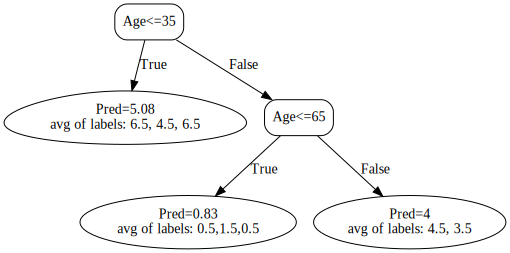

In [71]:
# so the tree looks like
dot = graphviz.Digraph(comment='XGBoost Tree', format='svg', graph_attr={'rankdir': 'TD'})

dot.node('root', 'Age<=35', shape='box', style='rounded')
dot.node('left', 'Pred=5.08\navg of labels: 6.5, 4.5, 6.5', shape='egg')
dot.node('right', 'Age<=65', shape='box', style='rounded')
dot.node('rl', 'Pred=0.83\navg of labels: 0.5,1.5,0.5', shape='ellipse')
dot.node('rr', 'Pred=4\navg of labels: 4.5, 3.5')

dot.edge('root', 'left', label='True')
dot.edge('root', 'right', label='False')
dot.edge('right', 'rl', label='True')
dot.edge('right', 'rr', label='False')

dot

## SKLearn Impl of Regressor

score:  0.9013694524765015


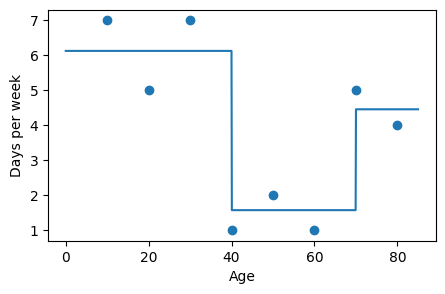

In [133]:
import xgboost
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(random_state=0,
                             n_estimators=5,
                             max_depth=2,
                             reg_lambda=0, # for similarity score
                             min_split_loss=1, # similarity gain pruning threshold
                             learning_rate=0.7
                             )
xgb_regressor.fit(features, labels)
print("score: ", xgb_regressor.score(features, labels))
plot_regressor(xgb_regressor, features, labels)

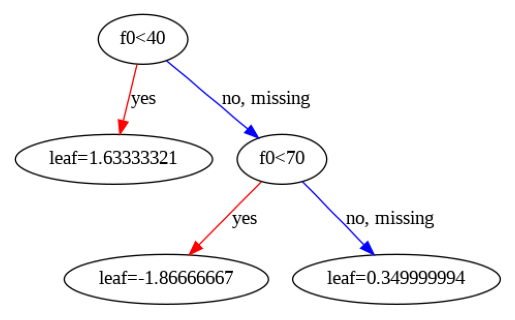

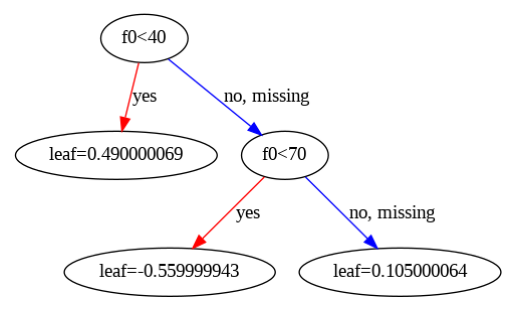

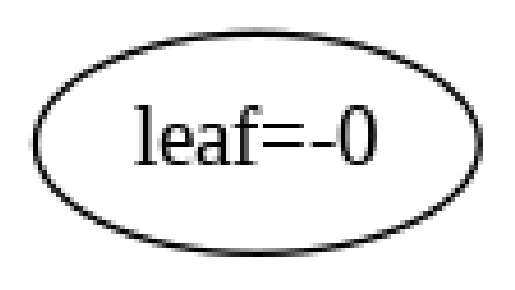

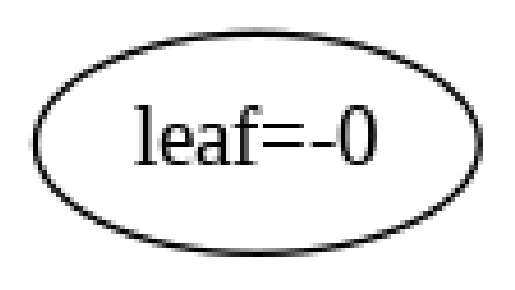

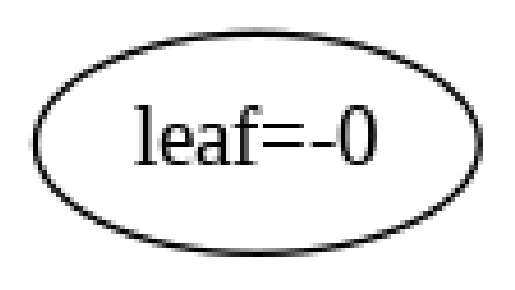

In [135]:
booster = xgb_regressor.get_booster()
num_trees = booster.num_boosted_rounds()
for i in range(num_trees):
  xgboost.plot_tree(booster, num_trees=i)

# the leaf=-0 nodes are pruned

## SKLearn Impl of Classifier

In [96]:
import xgboost
from xgboost import XGBClassifier

features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']

xgb_classifier = XGBClassifier(n_estimators=5)
xgb_classifier.fit(features, labels)
xgb_classifier.score(features, labels)

0.8888888888888888

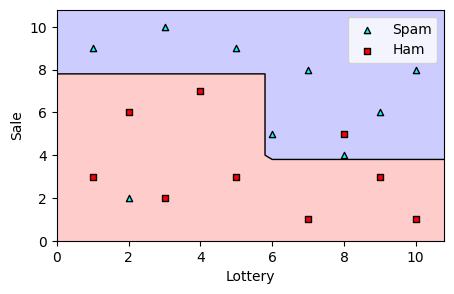

In [97]:
plt.figure(figsize=(5,3))
plot_model(features, labels, xgb_classifier, size_of_points=20)